In [1]:
import import_ipynb
import preprocess_model as pre

importing Jupyter notebook from preprocess_model.ipynb


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
df = pre.df_fnn


# Define the learning rate


In [ ]:
learning_rate = 0.0001  


# Define the model


In [ ]:
input_layers = []
embedding_layers = []

for country in pre.Country:
    input_layer = Input(shape=(1,), name=country)
    embedding_layer = Embedding(input_dim=len(df[country].unique()), output_dim=10)(input_layer)
    flatten_layer = Flatten()(embedding_layer)
    input_layers.append(input_layer)
    embedding_layers.append(flatten_layer)

input = Input(shape=(len(pre.X_col),), name='input')
embedding_layers.append(input)



# Concatenate all input layers


In [ ]:
concatenated = Concatenate()(embedding_layers)



# Fully connected layers with dropout for regularization


In [ ]:
x = Dense(256, activation='relu')(concatenated)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu')(x)
output_layer = Dense(1, activation='linear', name='output')(x)



# Model


In [ ]:
model = Model(inputs=input_layers + [input], outputs=output_layer)



# Compile the model with Mean Squared Error loss and the specified learning rate


In [ ]:
model.compile(optimizer=Adam(lr=learning_rate), loss='mean_squared_error') #soft-max reg



# Train the model for more epochs


In [ ]:
history = model.fit([pre.X_train[country] for country in pre.Country] + [pre.X_train[pre.X_col]],
                    pre.y_train, epochs=200, batch_size=64,
                    validation_data=([pre.X_val[country] for country in pre.Country] + [pre.X_val[pre.X_col]], pre.y_val),
                    verbose=1)


Epoch 1/200



13/13 [==============================] - 3s 39ms/step - loss: 9437.2207 - val_loss: 9185.7373
Epoch 2/200
13/13 [==============================] - 0s 13ms/step - loss: 8559.1221 - val_loss: 7406.4390
Epoch 3/200
13/13 [==============================] - 0s 14ms/step - loss: 5413.4375 - val_loss: 2450.2463
Epoch 4/200
13/13 [==============================] - 0s 15ms/step - loss: 1642.8480 - val_loss: 1043.8152
Epoch 5/200
13/13 [==============================] - 0s 14ms/step - loss: 1060.8109 - val_loss: 724.1355
Epoch 6/200
13/13 [==============================] - 0s 12ms/step - loss: 708.6364 - val_loss: 369.2882
Epoch 7/200
13/13 [==============================] - 0s 12ms/step - loss: 516.6848 - val_loss: 286.6387
Epoch 8/200
13/13 [==============================] - 0s 12ms/step - loss: 401.2653 - val_loss: 206.4775
Epoch 9/200
13/13 [==============================] - 0s 11ms/step - loss: 348.6602 - val_loss: 173.3916
Epoch 10/200
13/13 [==============================] - 0s 13ms/step 


# Evaluate the model on the test set


In [ ]:
test_loss = model.evaluate([pre.X_test[country] for country in pre.Country] + [pre.X_test[pre.X_col]], pre.y_test)
print(f'Test Loss: {test_loss}')


9/9 [==============================] - 0s 4ms/step - loss: 144.9937
Test Loss: 144.9937286376953



# Plot the training history


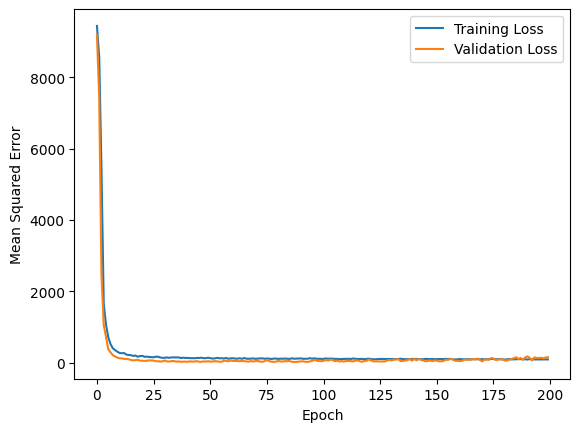

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

## Make predictions


In [ ]:
# test = ['School enrollment, primary', 'School enrollment, tertiary', 'Primary completion rate', 'Year', 'Country']
# # print(df[test])
# new_data = pd.DataFrame({
#     'School enrollment, primary': [100.911263,100.911262512207],
#     'School enrollment, tertiary': [28.845509  ,28.8455085754395],
#     'Primary completion rate': [96.636715, 96.63671493530276],
#     'Year': [2023,2023],
#     'Country': ["Afghanistan", "Japan"],
# })

# # 100.911262512207,28.8455085754395,96.63671493530276
# # Preprocess the new data similar to the training data
# # Standardize numerical features
# new_data[pre.X_col] = pre.scaler.transform(new_data[pre.X_col])

# # Preprocess
# for country in pre.Country:
#     new_data[country] = pre.label_encoders[country].transform(new_data[country])

# # # Make predictions on the new data
# predictions_future = model.predict([new_data[country] for country in pre.Country] + [new_data[pre.X_col]])
# print(predictions_future)

predictions = model.predict([pre.X_test[country] for country in pre.Country] + [pre.X_test[pre.X_col]])
# print(pre.y_test)
print(predictions)
# import seaborn as sns

# sns.kdeplot(pre.y_test, label='Actual', shade=True)
# sns.kdeplot(predictions.flatten(), label='Predicted', shade=True)
# plt.xlabel('Literacy rate')
# plt.ylabel('Literacy rate')
# plt.title('Distribution of Actual vs. Predicted Literacy rate')
# plt.show()
# residuals = pre.y_test - predictions.flatten()

# plt.scatter(pre.y_test, residuals)
# plt.axhline(y=0, color='red', linestyle='--')
# plt.xlabel('Actual Literacy rate')
# plt.ylabel('Residuals')
# plt.title('Residual Plot')
# plt.show()


mse = mean_squared_error(pre.y_test, predictions)
mae = mean_absolute_error(pre.y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


9/9 [==============================] - 0s 2ms/step
[[84.814125]
 [89.097336]
 [87.524   ]
 [87.17668 ]
 [88.619675]
 [85.82928 ]
 [88.51906 ]
 [88.68945 ]
 [86.65847 ]
 [88.350945]
 [86.76946 ]
 [88.80492 ]
 [88.0735  ]
 [86.39382 ]
 [89.01312 ]
 [86.749725]
 [87.87634 ]
 [88.28172 ]
 [86.48237 ]
 [88.77612 ]
 [86.88878 ]
 [85.584816]
 [87.72598 ]
 [85.53548 ]
 [85.97554 ]
 [84.955154]
 [87.992096]
 [87.289696]
 [85.63856 ]
 [86.73366 ]
 [87.5961  ]
 [87.56381 ]
 [89.39644 ]
 [87.6877  ]
 [87.402016]
 [88.950745]
 [86.972916]
 [87.91348 ]
 [88.03743 ]
 [86.92884 ]
 [87.96658 ]
 [87.43586 ]
 [86.62399 ]
 [88.433205]
 [85.39974 ]
 [86.441574]
 [86.278625]
 [86.46564 ]
 [87.02553 ]
 [82.05827 ]
 [87.24811 ]
 [83.685776]
 [88.63251 ]
 [86.41327 ]
 [86.3289  ]
 [88.403625]
 [87.763145]
 [86.84027 ]
 [85.21524 ]
 [87.25777 ]
 [88.537506]
 [87.265114]
 [86.00767 ]
 [81.98564 ]
 [85.60402 ]
 [85.13162 ]
 [85.05917 ]
 [84.98584 ]
 [84.58075 ]
 [87.4648  ]
 [86.18643 ]
 [88.544815]
 [89.094505]
